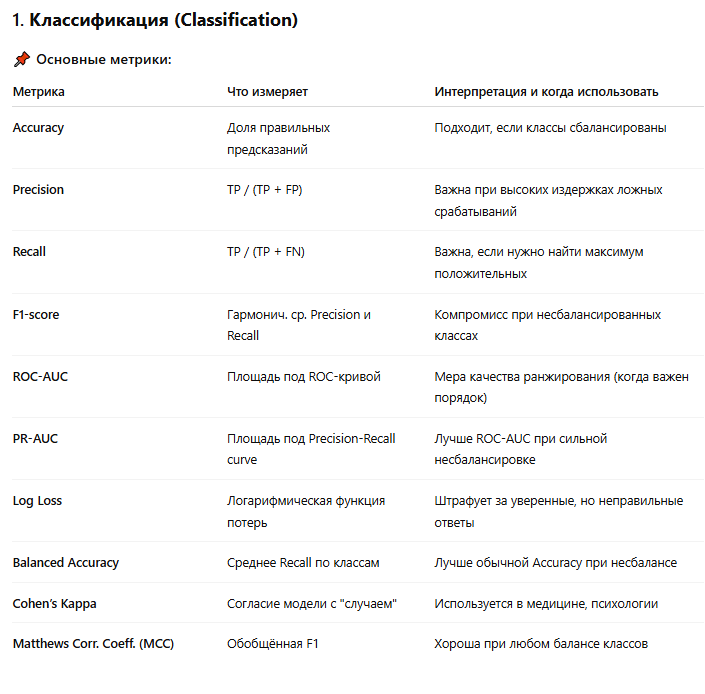

In [1]:
from IPython.display import Image
Image('t1.png')

# 2. Многоклассовая классификация
## Метрики те же, но:

Precision, Recall, F1 → считаются как macro, micro, weighted, per-class

ROC-AUC → применяется через OvR (One-vs-Rest)

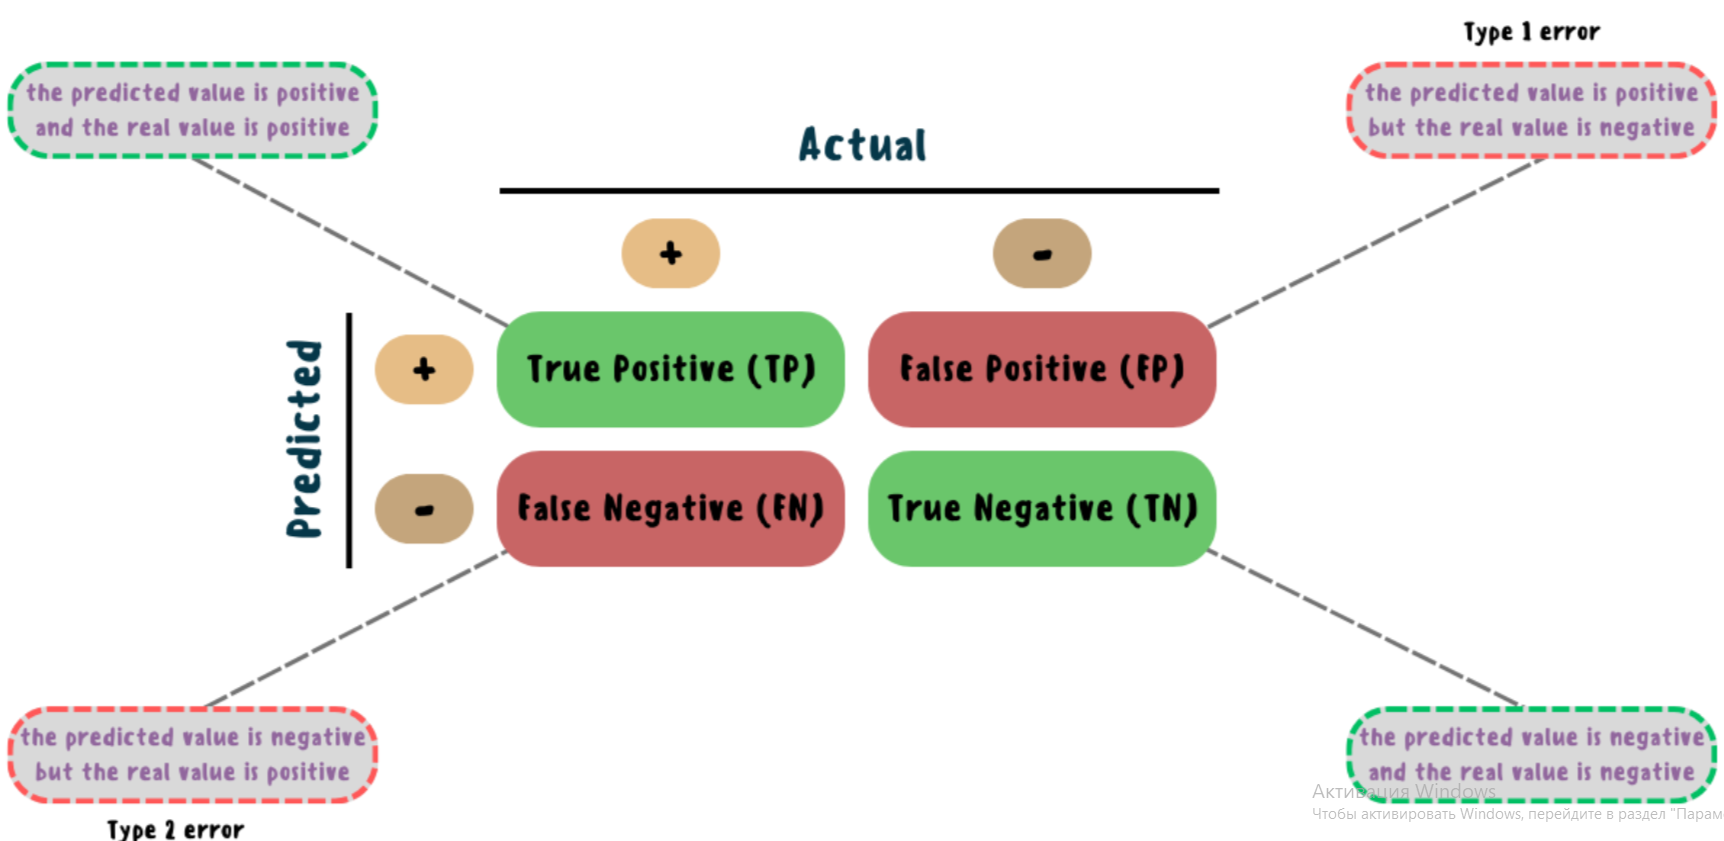

In [3]:
Image('matrix.png')

# Accuracy

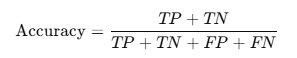

In [4]:
Image('acc.png')

* Процент правильных предсказаний от всех.
* Хорошо работает, если классы сбалансированы.

### Не смотря на свою простоту и универсальность, Accuracy имеет ряд серьёзных недостатков
* не учитывает дисбаланс классов: если один класс значительно преобладает над другим, то модель может быть смещена в его сторону, и тогда высокая точность не будет отражать истинное качество модели
* не даёт информацию о типе ошибок модели, например, о количестве ложноположительных и ложноотрицательных результатов, что не позволяет учитывать цену ошибки для разных классов;
* зависит от порога классификации, изменение которого может значительно повлиять на значение точности.

# Precision (Точность позитивного класса)

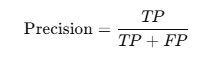

In [5]:
Image('pre.png')

* Из всех объектов, предсказанных как положительные, сколько действительно положительных.
* Важно при высокой стоимости FP (например, ложное обвинение).

### Например:
* модель отнесла 100 объектов к положительному классу
* precision = 0.92
## Значит:
Из предсказанных 100 объектов, 92 действительно относятся к этому классу

#  Recall (Полнота, чувствительность)

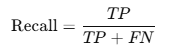

In [6]:
Image('recall.png')

* Из всех реальных положительных объектов — сколько угадали.
* Важно при высокой стоимости FN (например, пропущенная болезнь).

### Например:
* recall = 0.73
## Значит:
модель нашла всего 73% объектов из всех объектов положительного класса

#  F1-Score

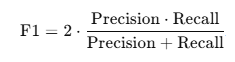

In [7]:
Image('f1.png')

* Гармоническое среднее между Precision и Recall.
* Используется при дисбалансе классов.

# Кейсы
## 3. Финансовое мошенничество (fraud detection)
### Контекст: Нужно определить, являются ли транзакции мошенническими.
* ❗️Важно: Не пропустить реальные мошеннические операции (True Positive), но и не блокировать слишком много легальных транзакций (False Positive).
* 📊 Выбор метрики: **F1-score** — компромисс между Recall и Precision.
* Если только Recall: мы пометим слишком много нормальных транзакций как мошеннические (высокий FP).
* Если только Precision: рискуем пропустить часть реальных мошенников (высокий FN).
* F1 позволяет уравновесить это.

## 4. Спам-фильтр для почты
### Контекст: Определить, является ли письмо спамом.
* ❗️Важно: Не помечать важные письма как спам (низкий False Positive).
* 📊 Выбор метрики: **Precision**
* Лучше пропустить спам (FN), чем случайно удалить важное письмо (FP).
* Высокая точность означает, что те, кого мы отметили как спам — действительно спам.

## 5. Автоматическая диагностика на МРТ (медицина, дорогие процедуры)
### Контекст: ИИ предсказывает, нужно ли направлять пациента на дорогое обследование.
* ❗️Важно: Не пропустить пациентов с потенциальной патологией (низкий FN).
* 📊 Выбор метрики: **Recall**
* Лучше перенаправить больше людей (высокий FP), чем пропустить заболевание.
* Особенно критично при раннем выявлении рака и т.п.

## 6. Подбор кандидатов на работу с помощью ИИ
### Контекст: ИИ фильтрует резюме кандидатов для собеседования.
* ❗️Важно: Предложить интервью тем, кто действительно подходит (низкий FP).
* 📊 Выбор метрики: **Precision**
* Чтобы не тратить время HR на неподходящих.
* FP — пригласили не того, FN — не пригласили хорошего кандидата (не критично, если есть много хороших).

# TPR (True Positive Rate)
Также известна как Recall.


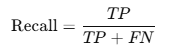

In [10]:
Image('recall.png')

Интерпретация:
Из всех реально положительных объектов — сколько мы нашли.

Пример:
Если модель находит 90 из 100 больных пациентов, то TPR = 0.9 → хорошо находит «болезнь»

# FPR (False Positive Rate)

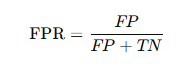

In [11]:
Image('fpr.png')

#### Интерпретация:
Из всех реально отрицательных объектов — сколько ошибочно признаны положительными.

#### Пример:
Если мы ошибочно ставим диагноз 10 здоровым из 100 — FPR = 0.1 → высоковато, может вызывать ложные тревоги

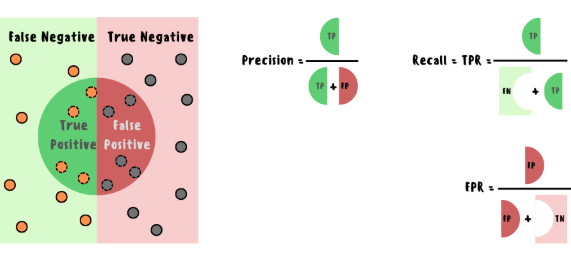

In [12]:
Image('fn_tn.png')

# Log Loss (Logarithmic Loss, Logarithmic Error)

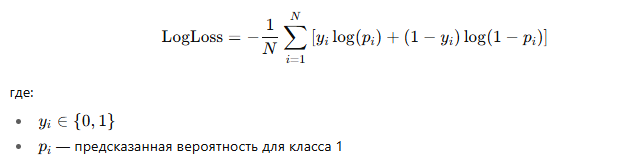

In [14]:
Image('logloss.png')

#### Интерпретация:
* Чем ближе вероятности к истинным меткам, тем меньше Log Loss.
* Жёстко штрафует уверенные ошибки: если модель уверена (0.99), но не права — штраф огромен.

# Итог
| Метрика  | Когда использовать                                             |
| -------- | -------------------------------------------------------------- |
| TPR      | Важно **найти все положительные** случаи (например, болезнь)   |
| FPR      | Важно **не тревожить зря** (например, судебные решения)        |
| ROC AUC  | Хорошо сравнивает моделей **независимо от порога**             |
| PR AUC   | **Лучше ROC AUC при сильном дисбалансе** классов               |
| Log Loss | Когда модель должна давать **верные вероятности**, а не классы |


# ROC-AUC

* Все предыдущие метрики позволяют оценить качество модели только при определённом пороге классификации.
* В случае, когда необходимо оценить качество модели при различных пороговых значениях, используется **AUC-площадь (Area Under Curve)** под **ROC-кривой (Receiver Operating Characteristics curve)**, выраженной через отношение доли истинно положительных прогнозов (TPR) к доли ложноположительных (FPR).

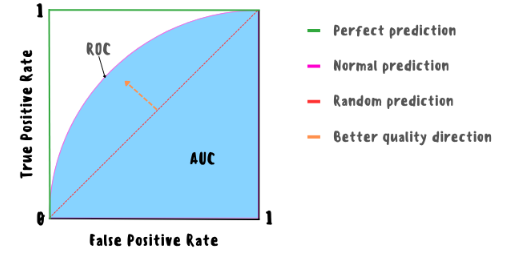

In [15]:
Image('roc_auc.png')

* В идеальном случае ROC-кривая будет стремиться в верхний левый угол (TPR=1 и FPR=0), а площадь под ней (AUC) будет равна единице.
* При значении площади 0.5 качество прогнозов модели будет сопоставимо случайному угадыванию, ну а если это значение меньше 0.5, то, модель лучше предсказывает результаты, противоположные истинным — в таком случае нужно просто поменять целевые метки местами для получения площади больше 0.5.

## В общем виде процесс состоит из следующих шагов:
1) сначала предсказанные моделью вероятности быть положительным классом сортируются в порядке убывания и принимаются как пороговые значения;
2) для каждого порога выполняется классификация (бинаризация) меток на 1 и 0, а на их основе рассчитываются FPR и TPR;
3) полученные FPR и TPR используются для расчёта AUC с помощью метода трапеций

### Однако такой процесс является неэффективным, поскольку при построении ROC-кривой используются все пороги, большинство из которых неоптимальные.

При  построении графика между двумя точками проводится прямая и если между ними есть ещё одна точка, расположенная на том же уровне, то она не будет отображаться на построенной ROC-кривой. Именно подобного рода точки называются неоптимальными. Следовательно, для построения ROC-кривой и расчёта площади под ней достаточно знать лишь угловые точки, что помимо прочего позволит строить более лёгкие ROC-кривые.

## Для поиска оптимальных значений необходимо выполнить следующие шаги:

1) для каждого отсортированного в порядке убывания порога выполняется бинаризация меток, на основе которых рассчитываются FP и TP;

2) для полученных FP и TP рассчитывается вторая разница между соседними значениями, которая выступает в качестве второй производной;

3) в местах, где вторая производная не равна нулю, будут расположены угловые точки;

4) позиции в списке угловых точек используются для поиска оптимальных порогов, FP и TP;

5) к списку оптимальных FP и TP добавляются нули в начало, чтобы ROC-кривая всегда начиналась в точке (0, 0); а к списку оптимальных порогов в начало добавляется максимальное значение y_score + 1, чтобы ROC-кривая заканчивалась в единице даже если все образцы неверно классифицированы;

6) на основе полученных оптимальных значений FP и TP рассчитываются оптимальные FPR и TPR, которые в дальнейшем используются для расчёта AUC с помощью метода трапеций.

# А теперь треним

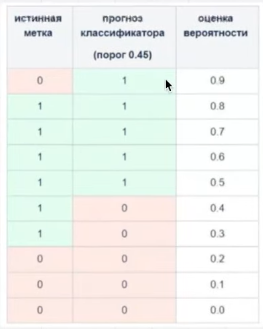

In [2]:
Image('train1.png')

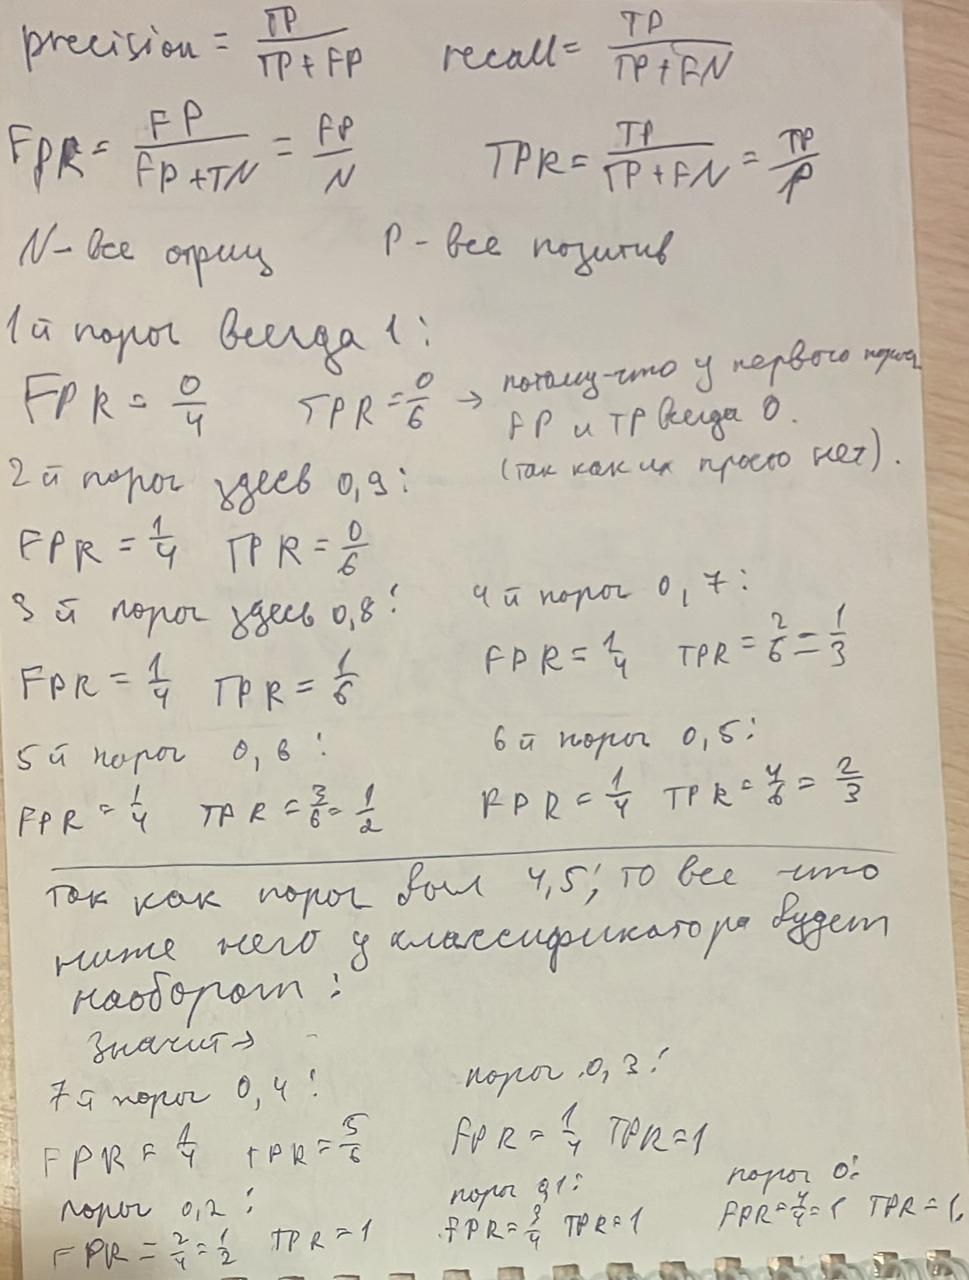

In [4]:
Image('train2.jpg')

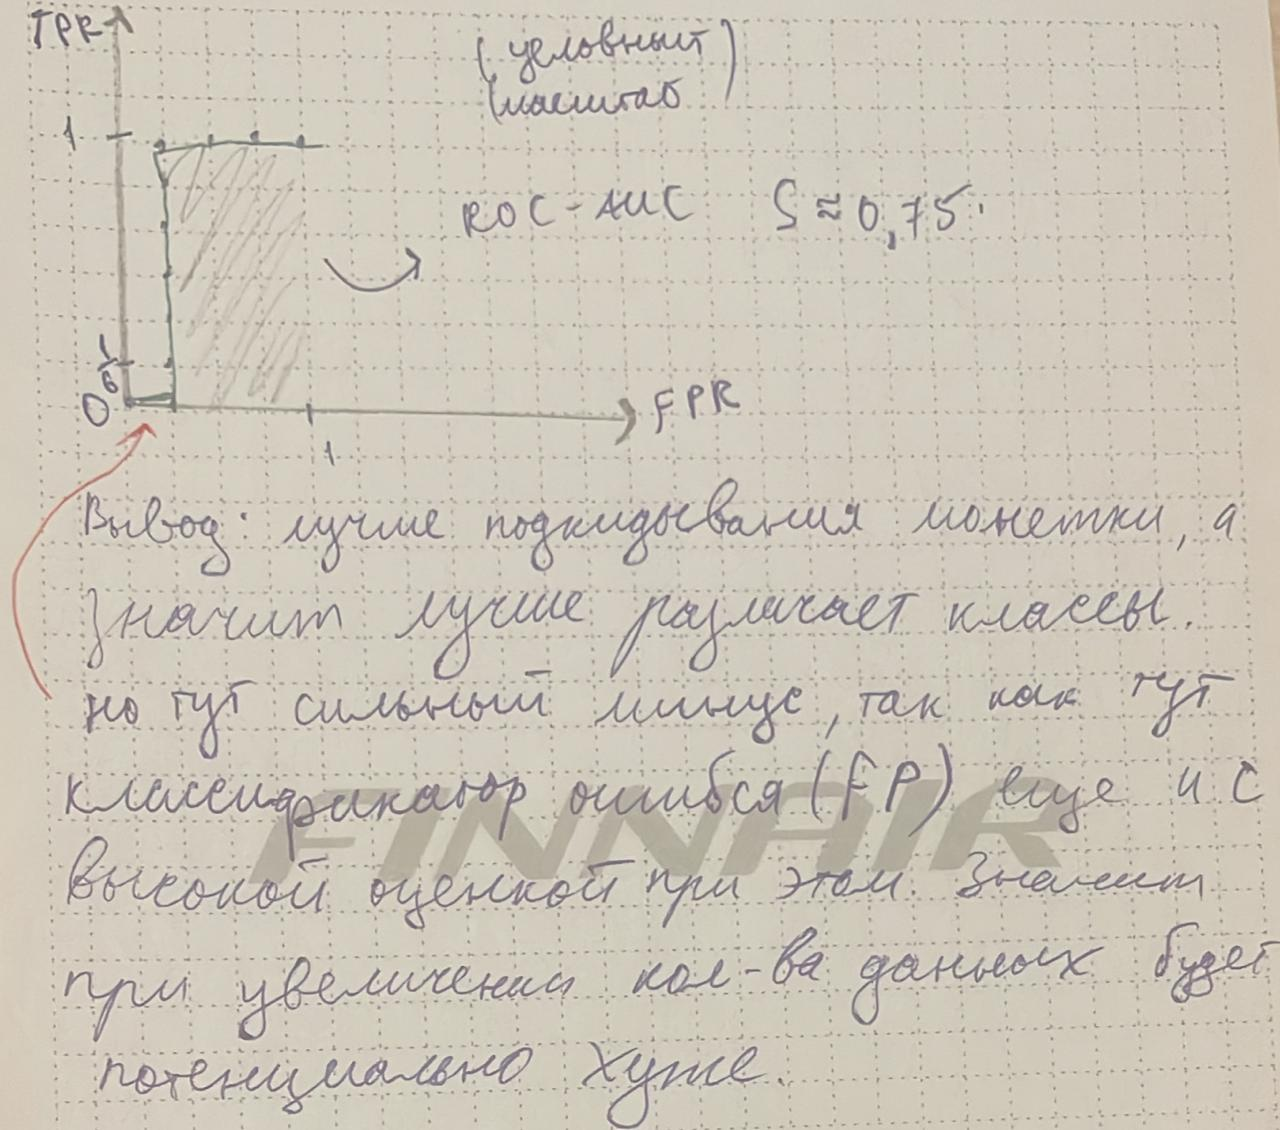

In [5]:
Image('train3.jpg')

# PR-AUC

Отсюда может сложиться впечатление, что ROC-AUC является хорошей метрикой для задач ранжирования, однако не всё так просто, как может показаться на первый взгляд. Дело в том, что ROC-AUC не очень хорошо справляется с сильным дисбалансом классов, поскольку учитывает истинно отрицательные случаи (TN), что вытекает из расчётов FPR. Проще говоря, модель может показать высокий TPR, но при этом также иметь большое количество ложноположительных предсказаний (FPR).

В таком случае можно использовать площадь в осях Precision Recall, известную как **PR-AUC**, которая лучше подходит для данных с сильным дисбалансом классов. Это связано с тем, что PR-AUC фокусируется на соотношении истинно положительных и ложноотрицательных результатов, что отражает лучше способность модели правильно определять положительные классы и, следовательно, лучше справляться в задачах ранжирования, где это необходимо в первую очередь.

ModuleNotFoundError: No module named 'caas_jupyter_tools'

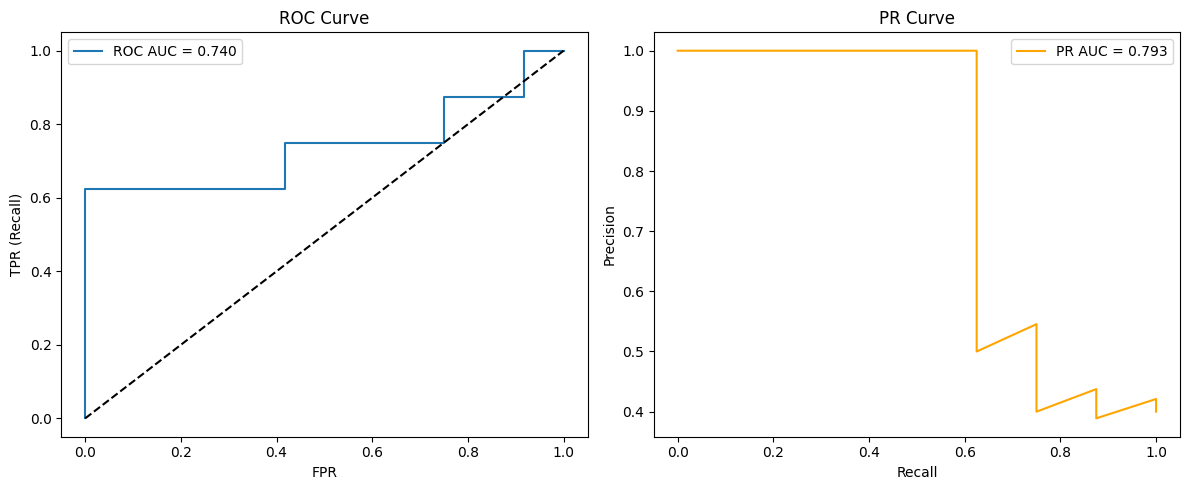

In [6]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, log_loss
import matplotlib.pyplot as plt

# Данные
data = pd.DataFrame({
    "y_true": [1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0],
    "y_prob": [0.95,0.90,0.85,0.80,0.70,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.30,0.25,0.20,0.15,0.10,0.05,0.02,0.01]
})

# Порог
threshold = 0.5
data["y_pred"] = (data["y_prob"] >= threshold).astype(int)

# Confusion matrix
cm = confusion_matrix(data["y_true"], data["y_pred"])
tn, fp, fn, tp = cm.ravel()

# Метрики
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
precision = precision_score(data["y_true"], data["y_pred"])
recall = recall_score(data["y_true"], data["y_pred"])
f1 = f1_score(data["y_true"], data["y_pred"])

# ROC и AUC
fpr_vals, tpr_vals, _ = roc_curve(data["y_true"], data["y_prob"])
roc_auc = auc(fpr_vals, tpr_vals)

# PR и AUC
prec_vals, rec_vals, _ = precision_recall_curve(data["y_true"], data["y_prob"])
pr_auc = auc(rec_vals, prec_vals)

# Log Loss
logloss_val = log_loss(data["y_true"], data["y_prob"])

# Вывод метрик
metrics_df = pd.DataFrame({
    "Metric": ["TPR (Recall)", "FPR", "Precision", "Recall", "F1-score", "ROC AUC", "PR AUC", "Log Loss"],
    "Value": [tpr, fpr, precision, recall, f1, roc_auc, pr_auc, logloss_val]
})

# Графики
plt.figure(figsize=(12,5))

# ROC
plt.subplot(1,2,1)
plt.plot(fpr_vals, tpr_vals, label=f'ROC AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')
plt.title('ROC Curve')
plt.legend()

# PR
plt.subplot(1,2,2)
plt.plot(rec_vals, prec_vals, label=f'PR AUC = {pr_auc:.3f}', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.legend()

plt.tight_layout()

import caas_jupyter_tools
caas_jupyter_tools.display_dataframe_to_user(name="Классификационные метрики", dataframe=metrics_df)
plt.show()


ROC-AUC часто относят к метрикам классификации, но по своей сути она ближе к метрикам ранжирования.
Причина — ROC-AUC не зависит от конкретного порога для перевода вероятностей в метки 0/1.

* ROC-AUC оценивает, насколько модель правильно упорядочивает положительные объекты выше отрицательных.
* Если для двух объектов с разными классами вероятность положительного класса выше у нужного — это плюс в AUC, если наоборот — минус.
* В идеале: все положительные примеры должны иметь предсказанную вероятность выше, чем все отрицательные.
* То есть мы измеряем качество сортировки по уверенности, а не просто точность при фиксированном пороге.

# One-vs-All (OvA, One-vs-Rest)

* Для задачи с k классами строим k бинарных классификаторов.
* Каждый классификатор отвечает на вопрос: «Этот объект принадлежит классу i или не принадлежит?».
* При предсказании берём тот класс, для которого классификатор выдал наибольшую уверенность.

### Плюсы:
* Простая реализация.
* Можно использовать любой бинарный алгоритм.
* Хорошо работает при большом числе объектов, но относительно небольшом числе классов.

## Минусы:
* Для несбалансированных классов отдельные классификаторы могут быть смещены.
* Не учитывает напрямую взаимосвязи между классами.

# One-vs-One (OvO, All-vs-All)

* Для задачи с k классами строим по одному бинарному классификатору для каждой пары классов → всего k*(k-1)/2 моделей.
* Каждая модель решает: «Этот объект из класса i или класса j?».
* При предсказании идёт «голосование» — объект относят к классу, набравшему больше всего побед.

### Плюсы:
* Каждая модель работает только с двумя классами → проще разделить, особенно если классы сложные.
* Меньше проблем с дисбалансом классов внутри каждой пары.

## Минусы:
* Количество моделей растёт квадратично с числом классов.
* Усложняется хранение и вычисление при большом числе классов.

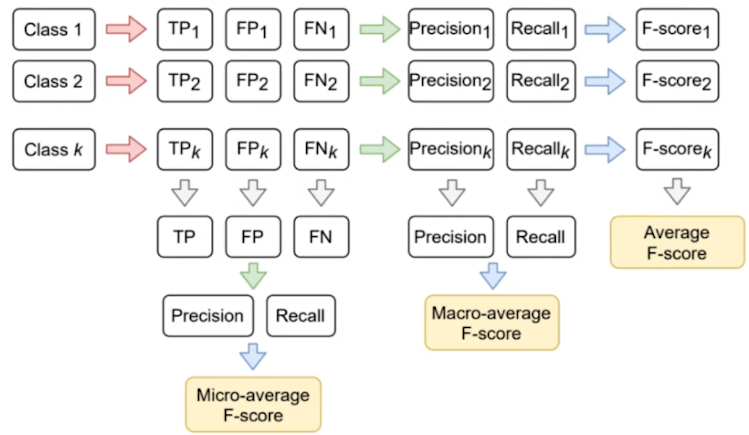

In [8]:
Image('mm.png')

# Микро-усреднение (micro-averaging)

* Считаем глобально: суммируем TP, FP, FN по всем классам и потом считаем метрику.
* Важная особенность: каждый объект вносит одинаковый вклад, а большие классы оказывают большее влияние.
### Плюсы:
* Хорошо отражает среднюю точность на всех объектах.
* Устойчиво при дисбалансе классов (если важен общий результат).
### Минусы:
* Мелкие классы могут быть «потеряны» в общей статистике.



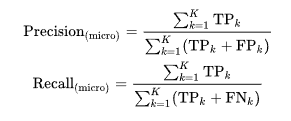

In [9]:
Image('micro.png')

# Макро-усреднение (macro-averaging)

* Считаем отдельно: вычисляем метрику для каждого класса и берём среднее арифметическое.
* Важная особенность: каждый класс весит одинаково.
### Плюсы:
* Все классы равны по влиянию, даже редкие.
* Хорошо видно, как модель справляется с малочисленными классами.
### Минусы:
* Если редкий класс предсказывается плохо, это сильно испортит итоговую метрику.

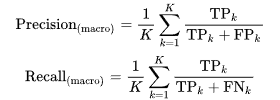

In [10]:
Image('macro.png')

# Weighted-averaging (взвешенное усреднение)
* Считаем отдельно для каждого класса, но берём среднее с весами, пропорциональными числу объектов в классе.
### Плюсы:
* Компромисс между Micro и Macro.
* Сохраняет баланс между точностью на всех объектах и равенством классов.
### Минусы:
* Всё ещё подвержено перекосу в сторону больших классов (хотя меньше, чем Micro).



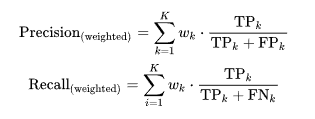

In [11]:
Image('weight.png')

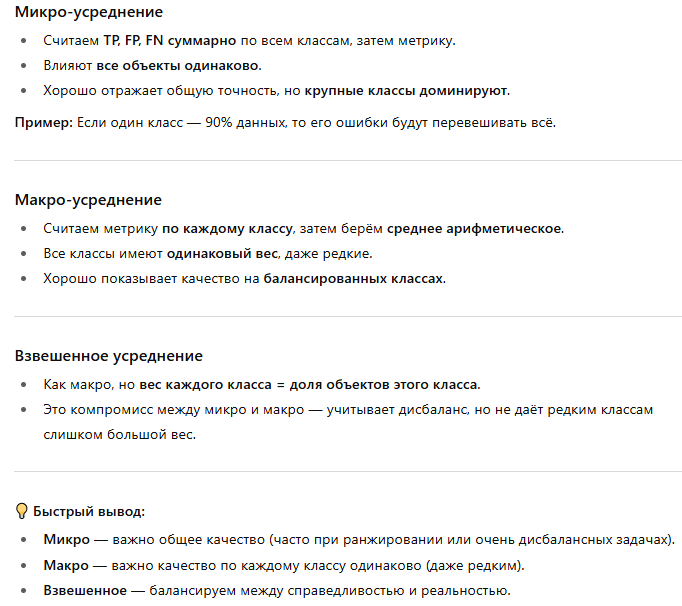

In [12]:
Image('conclusion.png')